# Bank Customer Churn Prediction using Machine Learning

In this Project , We will predict Whether a Customer will leave the bank or not based on many factors 

In [1]:
from IPython.display import Image
Image(url="https://media.istockphoto.com/id/995116780/vector/exit-icon-vector-illustration-isolated-on-white.jpg?s=612x612&w=0&k=20&c=CC_XSuh0TBOUa4PMKZL5vEI1ZnndOIdqtMDpL7y27RQ=")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
data= pd.read_csv("Churn_Modelling.csv")


<h3> Display Top 5 Rows of the Dataset </h3>

In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<h3>Check Last 5 Rows of the Dataset </h3>

In [5]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


<h3>Find Shape of Our Dataset(Number of Rows and Columns)</h3>

In [6]:
data.shape            # Shape is attributes not method

(10000, 14)

In [7]:
print("Number of Rows", data.shape[0])
print("Number of columns", data.shape[1])

Number of Rows 10000
Number of columns 14


<h3>Get information about our Dataset(Rows, Columns, Datatypes, Memory)</h3>

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


--> in Above data has 14 columns and 10000 Rows

--> 3 columns has object datatype, 11 column has numberical values

--> No missing values in the dataset

--> Exited column is target data

<h3>Check Null Values in The Dataset</h3>

In [9]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In our dataset there is no null values

<h2> Printing unique Values of the Categorical variables </h2>

In [10]:
print(data['Geography'].unique())
print(data['Gender'].unique())
print(data['NumOfProducts'].unique())
print(data['HasCrCard'].unique())
print(data['IsActiveMember'].unique())

['France' 'Spain' 'Germany']
['Female' 'Male']
[1 3 2 4]
[1 0]
[1 0]


<h3>Get Overall Statistics About the Dataset</h3>

In [11]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


    
mean < median : Negatively Skewed

mean > median : Positively Skewed

mean == median : Symmetric
    
most of the columns are symmetric only few columns are Negative and Positive skewed which are mentioned below

Balance is Negatively Skewed 

Has cr Card, Is Active Member are Negatively Skewed but it is categorical variable

num of Products column is Positively Skewed but it is categorical variable

In [12]:
data.describe(include="all")

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


<h3>Dropping Irrelevant Features</h3>

In [13]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [14]:
# we are dropping these columns bcaze there will be no effect of these columns in our model prediction
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis= 1, inplace= True)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<h3>Encoding Categorical Data</h3>

In [15]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [16]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

<AxesSubplot:xlabel='Geography', ylabel='count'>

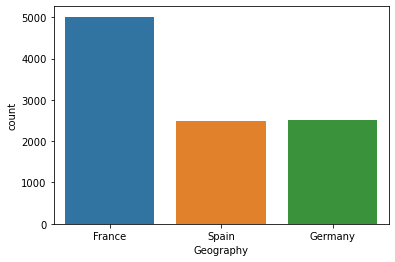

In [17]:
sns.countplot(data=data, x='Geography')

--> Count of Customers are more from location France as compare to Spain and Germany

--> Spain and Germany has almost similar count of customer (2509 & 2477)


In [18]:
data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

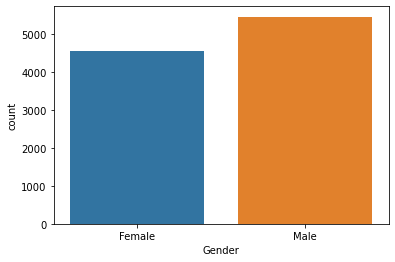

In [19]:
sns.countplot(data=data, x= 'Gender')

--> Male Customer are more as compared to Female customer

--> Male are(5457) & Female are(4543)

In [20]:
#data[data.Exited ==1] &
d1= data[(data.Balance != 0.00) & (data.Exited ==1)]
d1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
35,475,France,Female,45,0,134264.04,1,1,0,27822.99,1
...,...,...,...,...,...,...,...,...,...,...,...
9975,610,Germany,Male,50,1,113957.01,2,1,0,196526.55,1
9981,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9982,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9991,597,France,Female,53,4,88381.21,1,1,0,69384.71,1


--> out of 10000 , 2037 customer are exited from bank

--> from 2037, 1537 customer has balance in their account still they exited from bank

<AxesSubplot:>

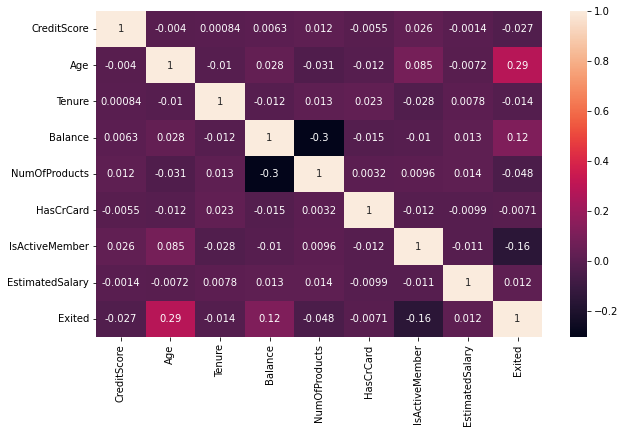

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)

-->  There is no Multicollinearity in between independent variable

<h2> Converting the categorical variable into Numerical </h2>

In [22]:
data= pd.get_dummies(data, drop_first= True)

In [23]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


<h3>Not Handling Imbalance</h3>

In [24]:
data.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<AxesSubplot:xlabel='Exited', ylabel='count'>

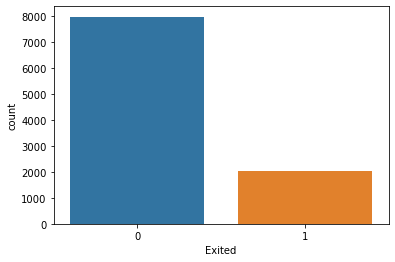

In [25]:
sns.countplot(data= data, x= 'Exited')

0 represent Customer is not leave from the bank

1 represent Cutomer left from the bank

So with help of graph we come to know that our dataset is Imbalance(target class have uneven distribution observation)

0 class have High number of observation than 1 class

<h2> Split data </h2>

In [26]:
x= data.drop('Exited',axis =1)
y= data['Exited']

In [27]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


<h2> Splitting the Dataset into the Training set and Test set </h2>

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test= train_test_split(x,y, test_size= 0.20, random_state= 42, stratify= y)

<h2> Feature Scaling </h2>

In [29]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [30]:
x_train= sc.fit_transform(x_train)
x_test= sc.transform(x_test)

In [31]:
x_train

array([[ 1.058568  ,  1.71508648,  0.68472287, ..., -0.57831252,
        -0.57773517,  0.90750738],
       [ 0.91362605, -0.65993547, -0.6962018 , ...,  1.72916886,
        -0.57773517,  0.90750738],
       [ 1.07927399, -0.18493108, -1.73189531, ...,  1.72916886,
        -0.57773517, -1.10191942],
       ...,
       [ 0.16821031, -0.18493108,  1.3751852 , ..., -0.57831252,
        -0.57773517, -1.10191942],
       [ 0.37527024, -0.37493284,  1.02995403, ..., -0.57831252,
         1.73089688,  0.90750738],
       [ 1.56586482,  1.14508121,  0.68472287, ..., -0.57831252,
         1.73089688,  0.90750738]])

# 1. Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
log= LogisticRegression()

In [34]:
log.fit(x_train, y_train)

LogisticRegression()

In [35]:
y_pred0= log.predict(x_test)

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

ac=accuracy_score(y_test,y_pred0)
cm= confusion_matrix(y_test,y_pred0)
cr= classification_report(y_test,y_pred0)

print(f"Accuracy Score: {ac}\n\nConfusion Matrix:\n{cm}\n\nClassification Report :\n{cr}")

Accuracy Score: 0.808

Confusion Matrix:
[[1540   53]
 [ 331   76]]

Classification Report :
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.59      0.19      0.28       407

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



there is big differences in Precision, Recall and F1-score ,in comparision between 0 and 1.

Reason of Difference is due to Imbalance of target data.

In [37]:
'''
[[1540   53]
 [331    76]]

[[TP   FP]
 [FN    TN]] '''

# Accuracy= (TP + TN)/(TP+FP+TN+FN)
(1540+76)/(1540+53+76+331)

0.808

In [38]:
# Precision= TP/(TP+FP)

print('Precision for(0):', (1540/(1540+331)))
print('Precision for(1):', (76/(76+53)))

Precision for(0): 0.8230892570817745
Precision for(1): 0.5891472868217055


In [39]:
# Recall= TP(TP+FN)

print('Recall for(0):', (1540/(1540+53)))
print('Recall for(1):', (76/(76+331)))

Recall for(0): 0.9667294413057125
Recall for(1): 0.18673218673218672


In [40]:
# F1 = 2 * (Precision*Recall) / (Precision + Recall)


print("F1 Score(0):", 2*(0.82*0.96)/(0.82+0.96))
print("F1 Score(1):", 2*(0.58*0.18)/(0.58+0.18))

F1 Score(0): 0.8844943820224719
F1 Score(1): 0.2747368421052631


# Handling Imbalanced Data with SMOTE

SMOTE (Synthetic Minority Oversampling Technique)

SMOTE is one of the most commonly used oversampling methods to solve the imbalance problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them.

In [41]:
from imblearn.over_sampling import SMOTE
x_res, y_res= SMOTE().fit_resample(x,y)
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

 <h2> Splitting the Dataset into The Training set and Test Set </h2>

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test= train_test_split(x_res,y_res, test_size= 0.20, random_state= 42)   # here we have to remove Stratify parameter

<h2> Feature Scaling </h2>

In [43]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train= sc.fit_transform(x_train)
x_test= sc.transform(x_test)
x_train

array([[-1.04933735e+00,  1.40553201e+00, -6.68212695e-01, ...,
        -5.67319140e-01, -4.65004427e-01, -8.44563031e-01],
       [ 1.10406252e+00,  9.93625694e-02, -1.40457025e+00, ...,
        -5.67319140e-01, -4.65004427e-01,  1.18404425e+00],
       [ 8.74828887e-02, -1.11200272e-03, -3.00033916e-01, ...,
        -5.67319140e-01,  2.15051716e+00,  1.18404425e+00],
       ...,
       [ 2.07723491e-01,  1.99837142e-01,  1.17268120e+00, ...,
        -5.67319140e-01, -4.65004427e-01,  1.18404425e+00],
       [-1.96722171e-01,  9.03159146e-01,  6.81448635e-02, ...,
        -5.67319140e-01, -4.65004427e-01, -8.44563031e-01],
       [ 5.35652405e-01,  1.00363372e+00, -1.40457025e+00, ...,
         1.76267630e+00, -4.65004427e-01,  1.18404425e+00]])

# Logistic Regression After SMOTE

Logistic Regression: Logistic regression is basically a supervised classification algorithm. logistic regression is a statistical method used to predict the relationship between a dependent variable and an independent variable. In this method, the dependent variable is a binary variable, meaning it can take only two values (yes or no, true or false, success or failure, 0 or 1).

In [44]:
from sklearn.linear_model import LogisticRegression
log= LogisticRegression()
log.fit(x_train, y_train)
y_pred1= log.predict(x_test)

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

ac=accuracy_score(y_test,y_pred1)
cm= confusion_matrix(y_test,y_pred1)
cr= classification_report(y_test,y_pred1)

print(f"Accuracy Score: {ac}\n\nConfusion Matrix:\n{cm}\n\nClassification Report :\n{cr}")

Accuracy Score: 0.7875078468298807

Confusion Matrix:
[[1271  362]
 [ 315 1238]]

Classification Report :
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1633
           1       0.77      0.80      0.79      1553

    accuracy                           0.79      3186
   macro avg       0.79      0.79      0.79      3186
weighted avg       0.79      0.79      0.79      3186



In [46]:
tr=log.score(x_train,y_train)
te= log.score(x_test,y_test)

print(f"Training Accuracy: {tr}\nTesting Accuracy: {te}")

Training Accuracy: 0.7828100470957614
Testing Accuracy: 0.7875078468298807


# Support Vector Classifier (SVC) 

SVC: Support Vector Machine(SVM) is a supervised machine learning algorithm used for both classification and regression. The objective of SVM algorithm is to find a hyperplane in an N-dimensional space that distinctly classifies the data points.

In [47]:
from sklearn import svm
svm= svm.SVC()
svm.fit(x_train, y_train)

SVC()

In [48]:
y_pred2= svm.predict(x_test)

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

ac=accuracy_score(y_test,y_pred2)
cm= confusion_matrix(y_test,y_pred2)
cr= classification_report(y_test,y_pred2)

print(f"Accuracy Score: {ac}\n\nConfusion Matrix:\n{cm}\n\nClassification Report :\n{cr}")

Accuracy Score: 0.8487131198995606

Confusion Matrix:
[[1378  255]
 [ 227 1326]]

Classification Report :
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1633
           1       0.84      0.85      0.85      1553

    accuracy                           0.85      3186
   macro avg       0.85      0.85      0.85      3186
weighted avg       0.85      0.85      0.85      3186



In [50]:
tr=log.score(x_train,y_train)
te= log.score(x_test,y_test)

print(f"Training Accuracy: {tr}\nTesting Accuracy: {te}")

Training Accuracy: 0.7828100470957614
Testing Accuracy: 0.7875078468298807


# KNeighbors Classifier

KNN: KNN is supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point.

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [52]:
y_pred3= knn.predict(x_test)

In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

ac=accuracy_score(y_test,y_pred3)
cm= confusion_matrix(y_test,y_pred3)
cr= classification_report(y_test,y_pred3)

print(f"Accuracy Score: {ac}\n\nConfusion Matrix:\n{cm}\n\nClassification Report :\n{cr}")

Accuracy Score: 0.8113622096672944

Confusion Matrix:
[[1307  326]
 [ 275 1278]]

Classification Report :
              precision    recall  f1-score   support

           0       0.83      0.80      0.81      1633
           1       0.80      0.82      0.81      1553

    accuracy                           0.81      3186
   macro avg       0.81      0.81      0.81      3186
weighted avg       0.81      0.81      0.81      3186



# Decision Tree Classifier

A decision tree is one of the supervised machine learning algorithms. A Decision tree is a flowchart-like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label. 

In [54]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [55]:
y_pred4= dt.predict(x_test)

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

ac=accuracy_score(y_test,y_pred4)
cm= confusion_matrix(y_test,y_pred4)
cr= classification_report(y_test,y_pred4)

print(f"Accuracy Score: {ac}\n\nConfusion Matrix:\n{cm}\n\nClassification Report :\n{cr}")

Accuracy Score: 0.795668549905838

Confusion Matrix:
[[1287  346]
 [ 305 1248]]

Classification Report :
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1633
           1       0.78      0.80      0.79      1553

    accuracy                           0.80      3186
   macro avg       0.80      0.80      0.80      3186
weighted avg       0.80      0.80      0.80      3186



# Random Forest Classifier

The Random forest or Random Decision Forest is a supervised Machine learning algorithm. The Random forest classifier creates a set of decision trees from a randomly selected subset of the training set. It is basically a set of decision trees (DT) from a randomly selected subset of the training set and then It collects the votes from different decision trees to decide the final prediction.

In [57]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [58]:
y_pred5= rf.predict(x_test)

In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

ac=accuracy_score(y_test,y_pred5)
cm= confusion_matrix(y_test,y_pred5)
cr= classification_report(y_test,y_pred5)

print(f"Accuracy Score: {ac}\n\nConfusion Matrix:\n{cm}\n\nClassification Report :\n{cr}")

Accuracy Score: 0.8656622724419335

Confusion Matrix:
[[1395  238]
 [ 190 1363]]

Classification Report :
              precision    recall  f1-score   support

           0       0.88      0.85      0.87      1633
           1       0.85      0.88      0.86      1553

    accuracy                           0.87      3186
   macro avg       0.87      0.87      0.87      3186
weighted avg       0.87      0.87      0.87      3186



# Gradient Boosting Classifier

Gradient Boosting is a popular boosting algorithm.It gives a prediction model in the form of an ensemble of weak prediction models, which are typically decision trees.

In [60]:
from sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier()
gbc.fit(x_train, y_train)

GradientBoostingClassifier()

In [61]:
y_pred6= gbc.predict(x_test)

In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

ac=accuracy_score(y_test,y_pred6)
cm= confusion_matrix(y_test,y_pred6)
cr= classification_report(y_test,y_pred6)

print(f"Accuracy Score: {ac}\n\nConfusion Matrix:\n{cm}\n\nClassification Report :\n{cr}")

Accuracy Score: 0.844632768361582

Confusion Matrix:
[[1387  246]
 [ 249 1304]]

Classification Report :
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1633
           1       0.84      0.84      0.84      1553

    accuracy                           0.84      3186
   macro avg       0.84      0.84      0.84      3186
weighted avg       0.84      0.84      0.84      3186



# Accuracy score with different model

In [63]:
final_data= pd.DataFrame({'Models': ['LR','SVC','KNN','DT','RF','GBC'],'Acc':[accuracy_score(y_test,y_pred1),
                                                                            accuracy_score(y_test,y_pred2),
                                                                            accuracy_score(y_test,y_pred3),
                                                                            accuracy_score(y_test,y_pred4),
                                                                            accuracy_score(y_test,y_pred5),
                                                                            accuracy_score(y_test,y_pred6)
                                                                            ]})

In [64]:
final_data

,Models,Acc
0,LR,0.787508
1,SVC,0.848713
2,KNN,0.811362
3,DT,0.795669
4,RF,0.865662
5,GBC,0.844633


So Random Forest is the Best Model for Prediction

<AxesSubplot:xlabel='Models', ylabel='Acc'>

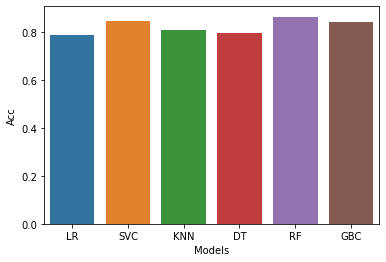

In [65]:
sns.barplot(final_data['Models'],final_data['Acc'])

# Save The Model using sklearn joblib

In [66]:
# scaling data after SMOTE
x_res= sc.fit_transform(x_res)

In [67]:
rf.fit(x_res,y_res)

RandomForestClassifier()

In [68]:
# Save and Load trained Model using either pickle or sklearn joblib
# joblib is more efficient on objects that carry large numpy arrays

import joblib

In [69]:
joblib.dump(rf,'Churn_predict_model')

['Churn_predict_model']

In [70]:
model= joblib.load('Churn_predict_model')

In [71]:
x.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

<h2> Credit Score- 619, Age- 42, Tenure-2, Balance-0.0, NumOfProducts- 0, HasCrCard- 0, IsActiveMember- 0, EstimatedSalary- 101348.88, Geography_Germany- 0, Geography_Spain- 0, Gender_male- 0 </h2>

In [72]:
model.predict([[619,42,2,0.0,0,0,0,101348.88,0,0,0]])  # this customer will exit

array([1], dtype=int64)

# Credit Score- 549, Age- 35, Tenure-5, Balance-86190.0, NumOfProducts- 1, HasCrCard- 0, IsActiveMember- 1, EstimatedSalary- 76520.80, Geography_Germany- 1, Geography_Spain- 0, Gender_male- 1

In [73]:
model.predict([[549,35,5,86190.0,1,0,1,76520.80,1,0,1]])  # this customer will not exit

array([0], dtype=int64)